# Python is slow (and that's not a bad trade-off)

### Compare python to other languages using "the benchmark game"

One of the most popular ways to compare programming language performance is to view the numbers at "The Benchmarks Game": https://benchmarksgame-team.pages.debian.net/benchmarksgame/index.html

Caveat: benchmark comparisons are notoriously difficult. People _always_ complain about them being unfair and they are generally right. Benchmarks really are difficult to do correctly and fairly.

Let's take a look at the results of specific benchmark:

In [19]:
import pandas as pd
import altair as alt

In [40]:
benchmark_df = pd.read_csv('./benchmark_game_nbody_jul_12_2025.csv')

In [41]:
benchmark_df

×        source    secs    mem    gz
0      1.0    * C gcc #9    2.10   2482  1639
1      1.0   * C++g++ #0    2.15   2417  1933
2      1.0     * Rust #9    2.19   3023  1881
3      1.5  * C# naot #9    3.13   6087  2480
4      1.5     * Rust #7    3.24   2937  1759
..     ...           ...     ...    ...   ...
101  177.0      Python 3  360.00  12198  1201
102  210.0   Python 3 #2  420.00  12554  1247
103  215.0       Perl #2  420.00   8741  1431
104  252.0   Python 3 #8  480.00  12497  1172
105  366.0       Ruby #7  720.00  18326  1139

[106 rows x 5 columns]

In [46]:
# Scatter plot
points = alt.Chart(benchmark_df).mark_circle(size=100).encode(
    # x='secs',
    # y='mem',
    x=alt.X('secs', scale=alt.Scale(type='log')),   # log scale for x-axis
    y=alt.Y('mem', scale=alt.Scale(type='log')),   # log scale for y-axis
    tooltip=['source', 'secs', 'mem']
)

# Add text labels using the 'source' column
languages_mask = benchmark_df[benchmark_df.source.str.contains('Python|C|Julia|R')]
labels = alt.Chart(languages_mask).mark_text(align='left', dx=5, dy=-5).encode(
    # x='secs',
    # y='mem',
    x=alt.X('secs', scale=alt.Scale(type='log')),   # log scale for x-axis
    y=alt.Y('mem', scale=alt.Scale(type='log')),   # log scale for y-axis
    
    text='source'
)

(points + labels).interactive().properties(width=1500, height=500)

/opt/anaconda3/envs/mleng/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/mleng/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

But keep in mind, python _is_ getting faster:
https://lost.co.nz/articles/sixteen-years-of-python-performance/

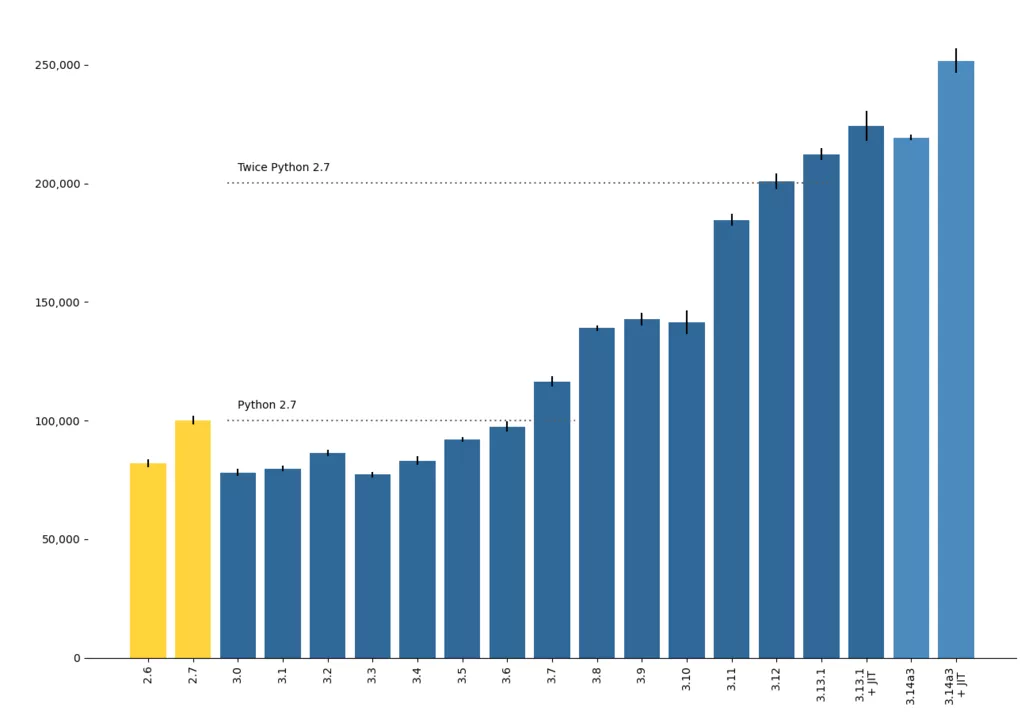